In [1]:
import pandas as pd
import re

pd.set_option('display.max_colwidth', 150)

## Read dataframe

In [2]:
#df = pd.read_excel("Final2019To2021.xlsx")
df = pd.read_excel("Final2018.xlsx")
df

,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,GENERAL PRACTICE INFORMATION
0,0,www.ablelaw.org,"Toledo, OH 43604",2018,"GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE GROUP NAME % OF PRACTICE\nCivil Rights, Human Rights, Constitutional Agricultural Workers & Immigrant R...",NaN,NaN,NaN
1,1,www.azalaw.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Looking forward to years of doc review and watching partners do all the fun stuff? Move along. AZA is a creative, fast-paced, litigation boutique,...",\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24
2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell..."
3,3,www.akingump.com,"Houston, TX 77002",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nIntellectual Property Intellectual Property 1 1 7 0 \nBusiness, Corporate Investment Funds 1 0 1 0 \nLabor and Employment Labor 0 0 2 0 \nLitiga...","\nIntellectual Property Intellectual Property 1 1 7 0 \nBusiness, Corporate Investment Funds 1 0 1 0 \nLabor and Employment Labor 0 0 2 0 \nLitiga..."
4,4,www.akingump.com,"Angeles, CA 90067",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 6 1 10 1 \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2 \nEnergyGovernment, Regulator...","\nBusiness, Corporate Corporate 6 1 10 1 \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2 \nEnergyGovernment, Regulator..."
...,...,...,...,...,...,...,...,...
1127,1127,www.winthrop.com,"Minneapolis, MN 55402",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,Winthrop & Weinstine is a business law firm of more than 135 attorneys with a deliberate culture of enterprise and fresh thinking. Located in Minn...,"\nBanking, Finance Banking/Finance 9 0 2 0 \nBusiness, Corporate Business/Corporate 16 1 9 1 \nGovernment, Regulatory,\nAdministrativeGovernment/R...","\nBanking, Finance Banking/Finance 9 0 2 0 \nBusiness, Corporate Business/Corporate 16 1 9 1 \nGovernment, Regulatory,\nAdministrativeGovernment/R..."
1128,1128,www.wolfgreenfield.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Our core values of having mutual respect, maintaining a collegial work environment, and providing sufficient time for family drive firm decisions....",\nIntellectual Property Biotechnology 12 0 6 0 \nIntellectual Property Chemical & Material\nTechnologies 5 1 4 0 \nIntellectual Property Electrica...,\nIntellectual Prope

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    1132 non-null   int64 
 1   Firm                          1132 non-null   object
 2   City                          903 non-null    object
 3   Year                          1132 non-null   int64 
 4   General_Practice              1132 non-null   object
 5   Organizational_Narrative      1130 non-null   object
 6   FIND                          1085 non-null   object
 7   GENERAL PRACTICE INFORMATION  1085 non-null   object
dtypes: int64(2), object(6)
memory usage: 70.9+ KB


In [4]:
#strip leading \n whitespace
df['GENERAL PRACTICE INFORMATION'] = df['GENERAL PRACTICE INFORMATION'].apply(lambda x: str(x).strip())
df[['GENERAL PRACTICE INFORMATION']]

,GENERAL PRACTICE INFORMATION
0,nan
1,Intellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24
2,"Business, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntellec..."
3,"Intellectual Property Intellectual Property 1 1 7 0 \nBusiness, Corporate Investment Funds 1 0 1 0 \nLabor and Employment Labor 0 0 2 0 \nLitigati..."
4,"Business, Corporate Corporate 6 1 10 1 \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2 \nEnergyGovernment, Regulatory,..."
...,...
1127,"Banking, Finance Banking/Finance 9 0 2 0 \nBusiness, Corporate Business/Corporate 16 1 9 1 \nGovernment, Regulatory,\nAdministrativeGovernment/Reg..."
1128,Intellectual Property Biotechnology 12 0 6 0 \nIntellectual Property Chemical & Material\nTechnologies 5 1 4 0 \nIntellectual Property Electrical ...
1129,"Business, Corporate Business/Tax 12 0 7 13 \nTrusts and Estates Trust and Estates 7 1 4 16 \nIntellectual Property Intellectual Property 3 0 1 2 \..."
1130,Appellate Appellate 3 2 2 0 \nLitigation Litigation 10 9 7 1


In [8]:
#2019 To 2021 data

# scraping all the fives, everything else, even if they contain some rows of five, is labeled as "Not all fives"

# new_rows = []
# matches = []
# for idx,row in df.iterrows():
#     general = row['GENERAL PRACTICE INFORMATION']
     
#     #not all 5s (or any at all..):
#     if re.findall("([a-zA-Z\s\_\-\&\,\.\/\+\']+ [0-9]* [0-9]* [0-9]* [0-9]* \n[a-zA-Z])", general):
#         new_rows = 'Not all fives'
#         matches.append(new_rows)
    
#     #all fives
#     else:
#         new_rows = re.findall("([a-zA-Z\s\_\-\&\,\.\/\+\']+ [0-9]+ [0-9]+ [0-9]+ [0-9]+ [0-9]+)", general) #added period and /

#         matches.append(new_rows)
        
        
# df['test'] = matches
# df

In [9]:
#2018 data file:
# scraping all the fours, everything else, even if they contain some rows of four, is labeled as "Not all fours"

new_rows = []
matches = []
for idx,row in df.iterrows():
    general = row['GENERAL PRACTICE INFORMATION']
     
    #not all 5s (or any at all..):
    if re.findall("([a-zA-Z\s\_\-\&\,\.\/\+\']+ [0-9]* [0-9]* [0-9]* \n[a-zA-Z])", general):
        new_rows = 'Not all fours'
        matches.append(new_rows)
    
    else:
        new_rows = re.findall("([a-zA-Z\s\_\-\&\,\.\/\+\']+ [0-9]+ [0-9]+ [0-9]+ [0-9]+)", general)
        #15 matches into list.
        matches.append(new_rows)
        
        
df['test'] = matches

,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,GENERAL PRACTICE INFORMATION,test
0,0,www.ablelaw.org,"Toledo, OH 43604",2018,"GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE GROUP NAME % OF PRACTICE\nCivil Rights, Human Rights, Constitutional Agricultural Workers & Immigrant R...",NaN,NaN,nan,[]
1,1,www.azalaw.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Looking forward to years of doc review and watching partners do all the fun stuff? Move along. AZA is a creative, fast-paced, litigation boutique,...",\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,Intellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,Not all fours
2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","Business, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntellec...","[Business, Corporate Corporate 8 3 17 1, \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0, \nGeneral Practice General 1 0 0 0, \nI..."
3,3,www.akingump.com,"Houston, TX 77002",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nIntellectual Property Intellectual Property 1 1 7 0 \nBusiness, Corporate Investment Funds 1 0 1 0 \nLabor and Employment Labor 0 0 2 0 \nLitiga...","Intellectual Property Intellectual Property 1 1 7 0 \nBusiness, Corporate Investment Funds 1 0 1 0 \nLabor and Employment Labor 0 0 2 0 \nLitigati...","[Intellectual Property Intellectual Property 1 1 7 0, \nBusiness, Corporate Investment Funds 1 0 1 0, \nLabor and Employment Labor 0 0 2 0, \nL..."
4,4,www.akingump.com,"Angeles, CA 90067",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 6 1 10 1 \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2 \nEnergyGovernment, Regulator...","Business, Corporate Corporate 6 1 10 1 \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2 \nEnergyGovernment, Regulatory,...","[Business, Corporate Corporate 6 1 10 1, \nBusiness, CorporateEnergyInternational Cross-Border\nTransactions 1 0 2 2, \nEnergyGovernment, Regula..."
...,...,...,...,...,...,...,...,...,...
1127,1127,www.winthrop.com,"Minneapolis, MN 55402",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,Winthrop & Weinstine is a business law firm of more than 135 attorneys with a deliberate culture of enterprise and fresh thinking. Located in Minn...,"\nBanking, Finance Banking/Finance 9 0 2 0 \nBusiness, Corporate Business/Corporate 16 1 9 1 \nGovernment, Regulatory,\nAdministrativeGovernment/R...","Banking, Finance Banking/Finance 9 0 2 0 \nBusiness, Corporate Business/Corporate 16 1 9 1 \nGovernment, Regulatory,\nAdministrativeGovernment/Reg...","[Banking, Finance Banking/Finance 9 0 2 0

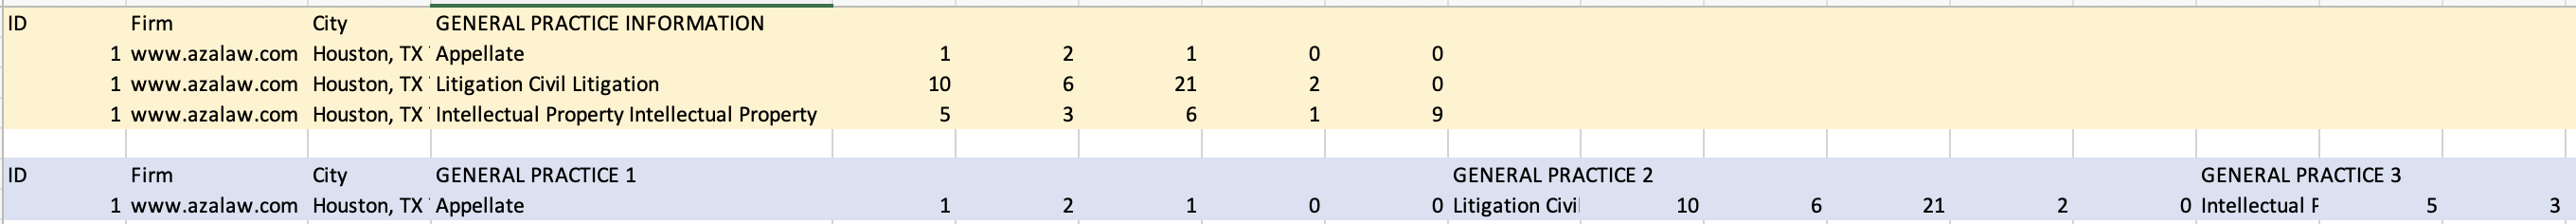

In [10]:
#want the YELLOW, so each instance is new, if its easier, only need to populate the 6 rows 
# for the example 13, make 13 new rows for this data

from IPython.display import Image
Image("format.png")

In [11]:
#creating new rows for each practice area
df = df.explode('test').reset_index(drop=False) #drop = false right now to have unique firm ids
#df

,index,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,GENERAL PRACTICE INFORMATION,test
0,0,0,www.ablelaw.org,"Toledo, OH 43604",2018,"GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE GROUP NAME % OF PRACTICE\nCivil Rights, Human Rights, Constitutional Agricultural Workers & Immigrant R...",NaN,NaN,nan,NaN
1,1,1,www.azalaw.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Looking forward to years of doc review and watching partners do all the fun stuff? Move along. AZA is a creative, fast-paced, litigation boutique,...",\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,Intellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,Not all fours
2,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","Business, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntellec...","Business, Corporate Corporate 8 3 17 1"
3,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","Business, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntellec...","\nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0"
4,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","Business, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntellec...",\nGeneral Practice General 1 0 0 0
...,...,...,...,...,...,...,...,...,...,...
6647,1129,1129,www.woodsoviatt.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Founded in 1852, Woods Oviatt Gilman LLP has offices in Rochester, New York, Buffalo, New York and Phoenix, Arizona. The firm brings together the ...","\nBusiness, Corporate Business/Tax 12 0 7 13 \nTrusts and Estates Trust and Estates 7 1 4 16 \nIntellectual Property Intellectual Property 3 0 1 2...","Business, Corporate Business/Tax 12 0 7 13 \nTrusts and Estates Trust and Estates 7 1 4 16 \nIntellectual Property Intellectual Property 3 0 1 2 \...","\nBanking, Finance Default Services 2 0 18 87"
6648,1129,1129,www.woodsoviatt.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Founded in 1852, Woods Oviatt Gilman LLP has offices in Rochester, New York, Buffalo, New York and

In [12]:
df[['test']]

,test
0,NaN
1,Not all fours
2,"Business, Corporate Corporate 8 3 17 1"
3,"\nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0"
4,\nGeneral Practice General 1 0 0 0
...,...
6647,"\nBanking, Finance Default Services 2 0 18 87"
6648,"\nReal Estate, Land Use Commercial 2 0 1 3"
6649,Appellate Appellate 3 2 2 0
6650,\nLitigation Litigation 10 9 7 1


In [13]:
#split test column into six new columns

df['practice'] = df.test.apply(lambda x: re.findall("[a-zA-Z\&\.\/\,\+\'\n]+",str(x)))

df['numbers'] = df.test.apply(lambda x: re.findall("[0-9]+", str(x)))
df[['index','Firm','test','practice','numbers']]

,index,Firm,test,practice,numbers
0,0,www.ablelaw.org,NaN,[nan],[]
1,1,www.azalaw.com,Not all fours,"[Not, all, fours]",[]
2,2,www.akingump.com,"Business, Corporate Corporate 8 3 17 1","[Business,, Corporate, Corporate]","[8, 3, 17, 1]"
3,2,www.akingump.com,"\nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0","[\nBanking,, FinanceBankruptcy, Financial\nRestructuring]","[2, 2, 4, 0]"
4,2,www.akingump.com,\nGeneral Practice General 1 0 0 0,"[\nGeneral, Practice, General]","[1, 0, 0, 0]"
...,...,...,...,...,...
6647,1129,www.woodsoviatt.com,"\nBanking, Finance Default Services 2 0 18 87","[\nBanking,, Finance, Default, Services]","[2, 0, 18, 87]"
6648,1129,www.woodsoviatt.com,"\nReal Estate, Land Use Commercial 2 0 1 3","[\nReal, Estate,, Land, Use, Commercial]","[2, 0, 1, 3]"
6649,1130,www.yettercoleman.com,Appellate Appellate 3 2 2 0,"[Appellate, Appellate]","[3, 2, 2, 0]"
6650,1130,www.yettercoleman.com,\nLitigation Litigation 10 9 7 1,"[\nLitigation, Litigation]","[10, 9, 7, 1]"


In [14]:
df['General_Practice_Area'] = df.practice.apply(lambda x: " ".join(x).strip())
df[['General_Practice_Area']]

,General_Practice_Area
0,nan
1,Not all fours
2,"Business, Corporate Corporate"
3,"Banking, FinanceBankruptcy Financial\nRestructuring"
4,General Practice General
...,...
6647,"Banking, Finance Default Services"
6648,"Real Estate, Land Use Commercial"
6649,Appellate Appellate
6650,Litigation Litigation


In [15]:
# #2019 To 2021
# #create a new dataframe with the values in separate columns
# new_df = pd.DataFrame(df['numbers'].to_list(), columns=['NO. OF PARTNERS/MEMBERS', 'NO. OF COUNSEL', 'NO. OF ASSOCIATES', 'NO. OF ENTRY-LEVEL PLACEMENTS LAST YEAR', 'NO. OF NON-TRADITIONAL TRACK/STAFF ATTORNEYS'])

# # combine the new dataframe with the original dataframe
# result = pd.concat([df, new_df], axis=1)

# result = result.drop(columns = ['GENERAL PRACTICE INFORMATION','test','practice','numbers'])
# result

In [16]:
#2018 data new dataframe

# create a new dataframe with the values in separate columns
new_df = pd.DataFrame(df['numbers'].to_list(), columns=['NO. OF PARTNERS/MEMBERS', 'NO. OF COUNSEL', 'NO. OF ASSOCIATES', 'NO. OF NON-TRADITIONAL TRACK/STAFF ATTORNEYS'])

# combine the new dataframe with the original dataframe
result = pd.concat([df, new_df], axis=1)

result = result.drop(columns = ['GENERAL PRACTICE INFORMATION','test','practice','numbers'])
result

,index,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,numbers,General_Practice_Area,NO. OF PARTNERS/MEMBERS,NO. OF COUNSEL,NO. OF ASSOCIATES,NO. OF NON-TRADITIONAL TRACK/STAFF ATTORNEYS
0,0,0,www.ablelaw.org,"Toledo, OH 43604",2018,"GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE GROUP NAME % OF PRACTICE\nCivil Rights, Human Rights, Constitutional Agricultural Workers & Immigrant R...",NaN,NaN,[],nan,None,None,None,None
1,1,1,www.azalaw.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Looking forward to years of doc review and watching partners do all the fun stuff? Move along. AZA is a creative, fast-paced, litigation boutique,...",\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,[],Not all fours,None,None,None,None
2,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","[8, 3, 17, 1]","Business, Corporate Corporate",8,3,17,1
3,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","[2, 2, 4, 0]","Banking, FinanceBankruptcy Financial\nRestructuring",2,2,4,0
4,2,2,www.akingump.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Akin Gump Strauss Hauer & Feld LLP is a leading global law firm with 20 offices and more than 900 lawyers and advisors in the United States, Asia,...","\nBusiness, Corporate Corporate 8 3 17 1 \nBanking, FinanceBankruptcy Financial\nRestructuring 2 2 4 0 \nGeneral Practice General 1 0 0 0 \nIntell...","[1, 0, 0, 0]",General Practice General,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,1129,1129,www.woodsoviatt.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Founded in 1852, Woods Oviatt Gilman LLP has offices in Rochester, New York, Buffalo, New York and Phoenix, Arizona. The firm brings together the ...","\nBusiness, Corporate Business/Tax 12 0 7 13 \nTrusts and Estates Trust and Estates 7 1 4 16 \nIntellectual Property Intellectual Property 3 0 1 2...","[2, 0, 18, 87]","Banking, Finance Default Services",2,0,18,87
6648,1129,1129,www.woodsoviatt.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Founded in 1852, Woods Oviatt Gilman LLP has offices in Rochester, New York, Buffalo, New York and Phoenix, Arizona. The firm brings together the ...","\nBusiness, Corporate Business/Tax 12 0 7 13 \nTrusts and Estates Trust and Estates 7 1 4 16 \nIntellectual Property Intellectual Property 3 0 1 2...","[2, 0, 1, 3]","Real Estate, Land Use Commercial",2,0,1,3
6649,1130,1130,www.yettercoleman.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Yetter

In [18]:
result[result.General_Practice_Area == 'Not all fours']

,index,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,numbers,General_Practice_Area,NO. OF PARTNERS/MEMBERS,NO. OF COUNSEL,NO. OF ASSOCIATES,NO. OF NON-TRADITIONAL TRACK/STAFF ATTORNEYS
1,1,1,www.azalaw.com,"Houston, TX 77010",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Looking forward to years of doc review and watching partners do all the fun stuff? Move along. AZA is a creative, fast-paced, litigation boutique,...",\nIntellectual Property Intellectual Property 3 3 9 \nLitigation Civil Litigation 5 6 24,[],Not all fours,None,None,None,None
101,16,16,www.alston.com,"Dallas, TX 75201",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,Alston & Bird has approximately 800 attorneys providing a full range of services to domestic and international clients who conduct business all ov...,"\nLitigation Advocacy 3 7 1 \nIntellectual Property Intellectual Property -\nLitigation 1 4 \nIntellectual Property Technology, Privacy & IP\nTran...",[],Not all fours,None,None,None,None
102,17,17,www.alston.com,"Durham, NC 27703-8580",2018,GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STAF...,Alston & Bird has approximately 800 attorneys providing a full range of services to domestic and international clients who conduct business all ov...,\nIntellectual Property Patents - Chemical/Pharm 0 0 2 \nIntellectual Property IP Litigation 1 0 2 0 \nIntellectual Property Patents - Electrical ...,[],Not all fours,None,None,None,None
156,25,25,www.agg.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,Arnall Golden Gregory LLP is proud to have a track record of successful summer associate programs. We take great care in our selection process and...,"\nBankruptcy Bankruptcy 5 1 2 1 \nLitigation Litigation 25 2 9 1 \nBanking, FinanceBusiness, CorporateTax Corporate 20 6 8 0 \nGovernment, Regulat...",[],Not all fours,None,None,None,None
385,58,58,www.bakerdonelson.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STAF...,"Ranked by FORTUNE magazine as one of the ""100 Best Companies to Work For"" nine years in a row, Baker Donelson has built a reputation for achieving...","\nLabor and Employment Labor & Employment 37 5 17 2 \nBusiness, Corporate BakerResearch 1 \nLitigation Business Litigation 52 13 12 \nBanking, Fin...",[],Not all fours,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,1074,1074,www.wlrk.com,"NY, NY 10019",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Wachtell, Lipton, Rosen & Katz enjoys a global reputation as one of the world‚Äôs leading business law firms. Our deep experience in the fields of...","\nBusiness, Corporate Corporate 34 13 56 \nLitigation Litigation 25 18 43 \nBusiness, CorporateLitigation Restructuring and\nFinance 8 4 10 \nBusi...",[],Not all fours,None,None,None,None
6339,1089,1089,www.whitecase.com,"Alto, CA 94306",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Together we make a mark. \nWe are a truly global firm, with an international network that most firms can only dream of. It‚Äôs the reason many of ...","\nIntellectual Property Competition 6 2 18 \nBusiness, Corporate Corporate/&A 2 2 7",[],Not all fours,None,None,None,None
6346,1091,1091,www.woh.com,NaN,2018,GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE\nGROUP NAMENO. OF\nPART

In [19]:
result[result.General_Practice_Area == 'nan']

,index,Unnamed: 0,Firm,City,Year,General_Practice,Organizational_Narrative,FIND,numbers,General_Practice_Area,NO. OF PARTNERS/MEMBERS,NO. OF COUNSEL,NO. OF ASSOCIATES,NO. OF NON-TRADITIONAL TRACK/STAFF ATTORNEYS
0,0,0,www.ablelaw.org,"Toledo, OH 43604",2018,"GENERAL PRACTICE AREAS EMPLOYER'S PRACTICE GROUP NAME % OF PRACTICE\nCivil Rights, Human Rights, Constitutional Agricultural Workers & Immigrant R...",NaN,NaN,[],nan,None,None,None,None
64,9,9,www.allenmatkins.com,"City, CA 90067-6019",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"At Allen Matkins, we help clients capitalize on opportunity. \nWhether this opportunity comes from overcoming challenges or seeing and taking adva...","\nBusiness, Corporate Corporate &\nFinance 1 0 \nLitigation Litigation 3 0 \nReal Estate, Land Use Real Estate 12 9",[],nan,None,None,None,None
68,11,11,www.allenmatkins.com,"Angeles, CA 90017",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"At Allen Matkins, we help clients capitalize on opportunity. \nWhether this opportunity comes from overcoming challenges or seeing and taking adva...","\nBusiness, Corporate Corporate &\nFinance 7 5 \nLitigation Litigation 17 11 \nReal Estate, Land Use Real Estate 13 9",[],nan,None,None,None,None
69,12,12,www.allenmatkins.com,"Diego, CA 92101",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"At Allen Matkins, we help clients capitalize on opportunity. \nWhether this opportunity comes from overcoming challenges or seeing and taking adva...","\nBusiness, Corporate Corporate &\nFinance 3 0 \nLitigation Litigation 10 2 \nReal Estate, Land Use Real Estate 4 2",[],nan,None,None,None,None
183,30,30,www.arnoldporter.com,"Angeles, CA 90017",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Arnold & Porter has more than 1,000 lawyers across nine domestic and four international offices. Our Firm‚Äôs domestic offices are located in (lis...","\nAntitrust Antitrust \nBusiness, Corporate Corporate & Finance \nEnvironmental Environmental \nBusiness, Corporate Financial Services \nIntellect...",[],nan,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,1055,1055,www.vedderprice.com,"DC, DC 20005",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE GROUP\nNAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,Vedder Price is a business-focused law firm with a global reach and a proud tradition of maintaining long-term client relationships. With 450 prof...,"\nLabor and Employment Labor & Employment 2 2 \nLitigation Government Contracts 4 1 \nAdmiralty, Maritime, Aviation Global Transportation\nFinance...",[],nan,None,None,None,None
6325,1084,1084,www.whitecase.com,"Boston, MA 02109-1814",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Together we make a mark. \nWe are a truly global firm, with an international network that most firms can only dream of. It‚Äôs the reason many of ...","\nIntellectual Property Competition 2 1 \nLitigation Disputes 5 4 \nBusiness, Corporate Capital Markets 1 \nBanking, Finance Banking 1",[],nan,None,None,None,None
6326,1085,1085,www.whitecase.com,"Houston, TX 77002",2018,GENERAL PRACTICE AREAS EMPLOYER'S\nPRACTICE\nGROUP NAMENO. OF\nPARTNERS/MEMBERSNO. OF\nCOUNSELNO. OF\nASSOCIATESNO. OF\nNON-TRADITIONAL\nTRACK/STA...,"Together we make a mark. \nWe are a truly global firm, with an international network that most firms can only dream of. It‚Äôs the reason many of ...",\nEnergyIntellectual Property 

In [20]:
#For 2018, 246 and 111 firms don't have all four numbers. ((246+111)/1132)
#For 2019 to 2021, 561 and 1,382 don't have all the five numbers. (561 + 1,382)/3,043 firms

#Total incomplete/missing data: 55%
((246+111+561+1382)/(1132+3043))

0.5508982035928144

In [21]:
#export as an excel

#result.to_excel("NALP2018_4112023.xlsx")  
#result.to_excel("NALP2019To2021_4112023.xlsx")